
# Исследование многослойного персептрона




Загрузим некоторые данные для задачи регрессии. Эти данные имеют три признака и три переменные на выходе, 20 примеров.  

Входные данные желательно масштабировать, воспользуемся `StandardScaler()` для приведения их к нулевому среднему и единичному разбросу. Дальше будем работать именно с отмасштабированными входами.

В этом задании тестовые данные нам не потребуются.

In [1]:
from sklearn.neural_network import MLPRegressor # подключаем модуль
from sklearn.datasets import load_linnerud # функция для загрузки данных
from sklearn.metrics import mean_squared_error as mse # ошибка mse
from sklearn.preprocessing import StandardScaler # масштабирование данных
X, y = load_linnerud(return_X_y=True) # создаем данные
X_train, y_train=X, y

scaler=StandardScaler().fit(X_train) # масштабинатор (есть такое слово??)
X_train_scaled=scaler.transform(X_train) # масштабируем данные


# Задание
Создайте и обучите на этих данных многослойный персептрон:
- метод обучения 'lbfgs'
- два скрытых слоя по 15 нейронов в каждом
- функции активации для **скрытых** слоев - гиперболический тангенс (а какая функция активации на выходном слое? - по умолчанию)
- задайте `random_state=1`
- максимальное количество итераций - не меньше 1000

Для обучающих данных посчитайте выходы и найдите ошибку `mse` между посчитанными выходами и указаниями учителя, выведите ее на экран. Также выведите на экран число итераций обучения, которые на самом деле выполнялись (могут отличаться от максимального количества).

Ошибка MSE **должна** получиться меньше 50 условных единиц. Не обращайте внимание на предупреждения об отсутствии сходимости.

In [2]:

# создаем регрессор из многослойного персептрона
MAX_ITER=1000
regr = MLPRegressor(random_state=1, # фиксируем случайность
                    #solver='sgd', # метод обучения
                    solver='lbfgs', # метод обучения
                    # learning_rate='constant',
                    # learning_rate_init=1e-8,
                    hidden_layer_sizes=(15,15,), # количество нейронов в скрытых слоях
                    activation='tanh',
                    #activation='identity',
                    max_iter=MAX_ITER, # число эпох обучения
                    # shuffle=True,
                    # batch_size=5,
                    # early_stopping=False,
                    # tol=1e-20,
                    # n_iter_no_change=MAX_ITER,
                    # nesterovs_momentum=False,
                    verbose=True
                    )

regr.fit(X_train_scaled, y_train) # обучаем регрессор
pred_train=regr.predict(X_train_scaled) # проверяем на обучающих данных
print('Ошибка MSE:     ',mse(pred_train, y_train)) # смотрим на качество решения
print('Число итераций: ',regr.n_iter_) # количество итераций

Ошибка MSE:      3.6653970480138525
Число итераций:  1000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Нарисуйте на одном графике полученные выходы пунктирной линией и указания учителя для них сплошной, цвета могут быть разными. По горизонтальной оси - номер примера в том порядке, который был при расчете.


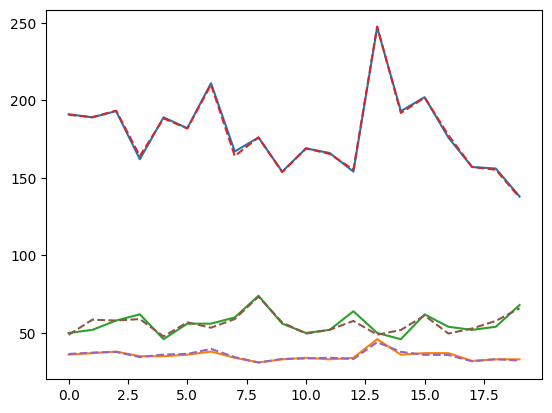

In [3]:
# рисуем
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.plot(y_train) # указания учителя
ax.plot(pred_train,'--') # выход сети
plt.show()

# ЭКСПЕРИМЕНТ 1

В этой лабораторной работе мы исследуем влияние входа на выход для обученного персептрона.

Сделайте функцию

 `input_change_experiment(regr,  input_vec, input_id,  range, num )`

 которая принимает
* `regr` - обученную модель нашего персептрона
* `input_vec` - заданный вектор входа (какой размер у него?)
* `input_id` - номер (индекс) входа, который будем менять
* `range` - диапазон, в котором этот вход будет меняться в формате (начало, конец)
* `num` - число изменений (проверок)

Эта функция принимает обученный персептрон, создает вектор входа в котором только указанный элемент отличается от заданного вектора входа. Все остальные входы не изменяются.

Считает выход для такого измененного вектора входа.

Указанный элемент входа изменяется в заданном диапазоне равномерно, заданное количество раз.

Функция возвращает пару `(out, x_line)` где
* `x_line` - массив значений изменяемого элемента входа (одномерный)  
* `out` - выходы, которые соответствовали такому входу.






In [4]:
import numpy as np # для массивов

# Эксперимент 1. Влияние входа на выход при фиксированных весах
def input_change_experiment(regr, # регрессор - многослойный персептрон
                            input_vec, # заданный вектор входа
                            input_id, # индекс элемента входа, который будем менять
                            range,# диапазон изменения (начало, конец)
                            num # число проверок
                            ):
  x_line=np.linspace(range[0],range[1],num) # создаем конкретные значения для входа
  X=np.resize(input_vec,(num,input_vec.shape[1])) # дублируем вектор входа много раз
  X[:,input_id]=x_line # заменяем вход с указанным индексом на сгенерированный
  out=regr.predict(X) # рассчитываем выходы для всех примеров
  return out, x_line # возвращаем


Проверьте работу такой функции и нарисуйте (на одном графике), как менялись все выходы при изменении входа для:
```
input_vec=np.array([[0,0,0]])
input_id=0
range=(-50 , 50)
num=1000
```

Разработанная функция должна работать для любых других допустимых значений аргументов.

В теле этой функции **не разрешается** использовать циклы в явном виде.

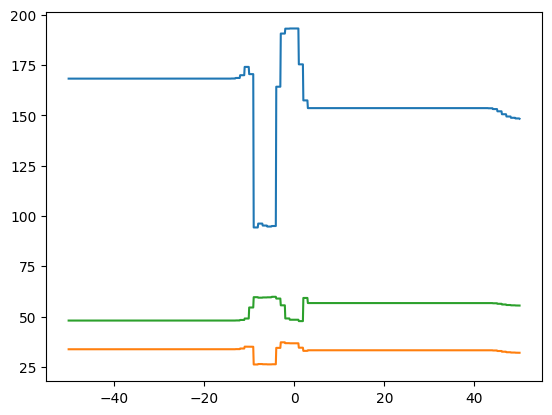

In [5]:
input_vec=np.array([[0,0,0]]) # базовый вход
input_id=0 # номер проверяемого элемента входа
range=(-50 , 50) # диапазон изменения (начало, конец)
num=1000 # число примеров

# проводим эксперимент 1
out,x_line=input_change_experiment(regr,input_vec,input_id,range,num)

# рисуем
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(x_line,out)
plt.show()


# ЭКСПЕРИМЕНТ 2


В этой лабораторной работе мы исследуем влияние веса на выход для обученного персептрона.

Сделайте функцию

 `weight_change_experiment(regr,  input_vec, weight_id,  range, num )`

 которая принимает
* `regr` - обученную модель нашего персептрона
* `input_vec` - заданный вектор входа (какой размер у него?)
* `weight_id` - номер (индекс) веса, который будем менять, в формате (индекс слоя, индекс входа в нейрон, индекс нейрона в слое)
* `range` - диапазон, в котором этот вес будет меняться, в формате (начало, конец)
* `num` - число изменений (проверок)

Эта функция принимает обученный персептрон, **изменяет** заданный вес, считает выходы для заданного входа. Все остальные веса не изменяются.

Указанный элемент веса изменяется в заданном диапазоне равномерно, заданное количество раз.

Функция возвращает пару `(out, w_line)` где
* `w_line` - массив значений изменяемого элемента веса (одномерный)  
* `out` - выходы, которые соответствовали такому весу.
  

Чтобы не повредить обученный регрессор, сделайте его копию и работайте с ней. Для этого воспользуемся командой `deepcopy` из библиотеки `copy`:

```
from copy import deepcopy
regr1=deepcopy(regr)
```

In [6]:
regr.coefs_[0].shape

(3, 15)

In [7]:
# Эксперимент 2. Влияние весов на выход при фиксированном входе
import numpy as np
from copy import deepcopy # нужно чтобы сделать копию регрессора и не повредить его
def weight_change_experiment(regr, # регрессор - многослойный персептрон
                             input_vec,  # заданный вектор входа
                             weight_id, # индекс элемента весов, который будем менять
                             # в формате (номер слоя, номер входа, номер нейрона)
                             range, # диапазон изменения (начало, конец)
                             num # число проверок
                             ):
  reg=deepcopy(regr) # делаем копию регрессора
  w_line=np.linspace(range[0],range[1],num) # задаем конкретные значения веса

  out=np.zeros((num,regr.n_outputs_)) # массив для хранения выходов, форма (число проверок, количество выходов)
  for i, w in enumerate(w_line): # в цикле по числу проверок
    reg.coefs_[weight_id[0]][weight_id[1]][weight_id[2]]= w # изменяем вес с заданным индексом
    out[i,:]=reg.predict(input_vec) # считаем выходы
  return out, w_line # возвращаем историю выходов и изменяемого веса

Проверьте работу такой функции и нарисуйте (на одном графике), как менялись все выходы при изменении веса для:
```
input_vec=np.array([[1,1,1]])
weight_id=[0,0,0]
range=(-50 , 50)
num=1000
```


Разработанная функция должна работать для любых других допустимых значений аргументов.

В теле этой функции **разрешается** использовать циклы в явном виде.

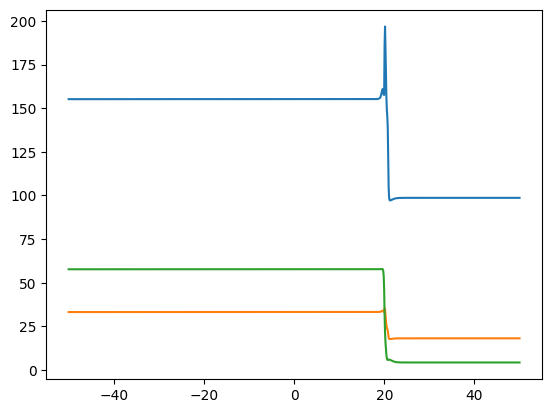

In [8]:
input_vec=np.array([[1,1,1]]) # вектор входа (почему не ноль??)
weight_id=[0,0,5] # индекс проверяемого веса ..
# в формате (номер слоя, номер входа, номер нейрона)
range=(-50 , 50) # диапазон изменения веса
num=1000 # число проверок веса

# Проводим эксперимент
out_w,w_line=weight_change_experiment(regr,input_vec,weight_id, range,num)

# рисуем
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(w_line,out_w[:])
plt.show()

In [9]:
print(regr.coefs_[0].shape)
regr.coefs_[0][2][5]

(3, 15)


-9.428085826972048

# Отправьте решение преподавателю
Отправьте решение в виде ссылки на ваш Colab файл. Файл должен запускаться без ошибок.



Ваш код вставляйте в места, помеченные # ВАШ КОД ЗДЕСЬ

Прочий код не изменяйте, ячейки не удаляйте. Укажите в шапке ваши ФИО.